In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/train.csv
/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/test.csv


### We picked up the Regression Problem from Kaggle i.e  Business Case 2: Cost Prediction for Logistic Company

## Load Train and Test Datasets

In [31]:
df_train = pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/train.csv')
df_test = pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/test.csv')

In [32]:
df_train.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777


In [6]:
df_test.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier
0,t333282728025,2017-09-27,night,NaN,S2,D8,2000,NaN,50,NaN,C
1,t35583500660,2017-12-12,day,snow,S2,D1,600,NaN,22,NaN,A
2,t117664376784,2018-11-18,day,NaN,S7,D1,1600,expedited,30,NaN,D
3,t261320757828,2019-11-18,day,NaN,S5,D6,2200,NaN,32,NaN,B
4,t147086054909,2019-06-02,night,heat,S6,D7,2600,NaN,7,NaN,B


## Import all required libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## Initialize Class and Function for Data Preprocessing Pipeline

In [34]:
class cost_logistic:
    
    #initialize self 
    def __init__(self,df):
        self.df = df
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_pred = None
        self.describe = None
        
    #load datasets    
    def load_data(self):
        return self.df
    
    #load columns
    def load_columns(self):
        return self.df.columns
    
    #check info about data
    def check_info(self):
        return self.df.info()
    
    #check null value proportions
    def check_null(self):
        #return self.df.isnull().sum()
        columns = self.df.columns
        for column in columns:
            null_count = self.df.isnull().sum()
            total_rows = len(self.df)
            null_percentages = (null_count / total_rows) * 100
            return null_percentages
        
    # Histograms    
    def check_histogram(self):
        features = ['weight','distance','cost','dayPart',  'originLocation',
                   'destinationLocation','carrier' ]
        
        for column in features:
            #self.df.hist(layout=(1, len(features)), figsize=(len(features) * 3, 3), bins=10)
            plt.figure(figsize=(4, 3))
            plt.hist(self.df[column], bins=20)  # Adjust 'bins' as needed
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
            
    # Bar Plot between Carrier and Cost        
    def bar_plot(self):
        plt.bar(self.df['carrier'],self.df['cost'])
        plt.xlabel('carrier')
        plt.ylabel('cost')
        plt.show()

    #scatter plot between cost and weight
    def scatter_plot(self):       
        plt.scatter(self.df['weight'],self.df['cost'])
        plt.xlabel("Weight")
        plt.ylabel("Cost")
        plt.show()
     
    #count unique values for categorical components
    def unique_values(self):
        return self.df.nunique()
    
    #Count values for of categorical columns
    def value_count(self):
        value_to_count = ['dayPart','originLocation','destinationLocation','carrier']
        for column in value_to_count:
            value_counts = self.df[column].value_counts()
            print(value_counts)
            
    #encode categorical variables
    def encode_df(self):
        categorical_columns = ['dayPart','carrier','originLocation','destinationLocation']
        for column in categorical_columns:
            dummies = pd.get_dummies(self.df[column], prefix = column, drop_first = False)
            self.df = pd.concat([self.df.drop(column, axis = 1), dummies], axis = 1)
     
    #convert datetime
    def date_month(self):
        self.df['date'] = pd.to_datetime(self.df['date'])
        # Extract the month as a numerical value(Feature Engineering)
        self.df['month'] = self.df['date'].dt.month
        self.df['year'] = self.df['date'].dt.year
        self.df['day'] = self.df['date'].dt.day
    
        
    #Drop unused columns
    def drop_columns(self):
        columns_to_drop = ['type','packageType', 'exWeatherTag']
        self.df = self.df.drop(columns_to_drop, axis = 1)  
        print(f"Deleted Columns are : {columns_to_drop}")                   
    
    #Finding Outliers
    def outliers(self):
        self.describe = self.df.describe()
        return self.describe
         
       
        
    
    #Heatmap for Correlations
    def correlation_matrix(self):
        correlation_matrix = self.df.corr()
        plt.figure(figsize=(14, 12))
        sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt = '.2f')
        plt.title('Correlation Heatmap')
        plt.show()
    
    #Preparing features and target for training  #remove new_train_df 
    def prepare_data(self):
        self.X_train = self.df[['distance','weight','dayPart_day', 'dayPart_night', 'carrier_A',
       'carrier_B', 'carrier_C', 'carrier_D', 'originLocation_S1','originLocation_S2',
        'originLocation_S3', 'originLocation_S4','originLocation_S5', 'originLocation_S6',
        'originLocation_S7','originLocation_S8', 'originLocation_S9', 'destinationLocation_D1',
       'destinationLocation_D2', 'destinationLocation_D3','destinationLocation_D4', 
        'destinationLocation_D5','destinationLocation_D6', 'destinationLocation_D7',
       'destinationLocation_D8', 'destinationLocation_D9', 'month','year','day']]
        self.y_train = self.df['cost']
        return self.X_train, self.y_train
    
    #Preparing features for test 
    def final_test(self):
        self.X_test = self.df[['distance','weight','dayPart_day', 'dayPart_night', 'carrier_A',
       'carrier_B', 'carrier_C', 'carrier_D', 'originLocation_S1','originLocation_S2',
        'originLocation_S3', 'originLocation_S4','originLocation_S5', 'originLocation_S6',
        'originLocation_S7','originLocation_S8', 'originLocation_S9', 'destinationLocation_D1',
       'destinationLocation_D2', 'destinationLocation_D3','destinationLocation_D4', 
        'destinationLocation_D5','destinationLocation_D6', 'destinationLocation_D7',
       'destinationLocation_D8', 'destinationLocation_D9', 'month','year','day']]
        return self.X_test
        
#load Train and Test datasets        
train = pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/train.csv')
test =  pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/test.csv')    

#creating class objects for train and test sets
train_obj = cost_logistic(train)
test_obj = cost_logistic(test)


    


## Load datasets

In [35]:
train_obj.load_data()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777
...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,night,NaN,S3,D3,1200,NaN,3,NaN,B,14.987239
38995,t53557166488,2019-01-23,night,NaN,S4,D6,2000,NaN,6,NaN,B,33.214738
38996,t337474787136,2018-10-03,night,NaN,S8,D7,3000,NaN,24,NaN,B,45.172159
38997,t76488353326,2018-02-26,night,NaN,S8,D5,2600,NaN,31,NaN,B,47.541427


In [36]:
test_obj.load_data()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier
0,t333282728025,2017-09-27,night,NaN,S2,D8,2000,NaN,50,NaN,C
1,t35583500660,2017-12-12,day,snow,S2,D1,600,NaN,22,NaN,A
2,t117664376784,2018-11-18,day,NaN,S7,D1,1600,expedited,30,NaN,D
3,t261320757828,2019-11-18,day,NaN,S5,D6,2200,NaN,32,NaN,B
4,t147086054909,2019-06-02,night,heat,S6,D7,2600,NaN,7,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...
797,t353400176448,2017-10-26,day,NaN,S4,D1,1000,NaN,489,TT,C
798,t112945848426,2018-09-01,day,NaN,S8,D3,2200,NaN,12,NaN,B
799,t53097944970,2018-06-20,day,NaN,S9,D2,2200,NaN,9,NaN,B
800,t127986960246,2019-01-13,night,NaN,S3,D3,1200,expedited,11,NaN,D


### Check datatypes and info related to columns

In [37]:
train_obj.check_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [38]:
test_obj.check_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trip                 802 non-null    object
 1   date                 802 non-null    object
 2   dayPart              802 non-null    object
 3   exWeatherTag         101 non-null    object
 4   originLocation       802 non-null    object
 5   destinationLocation  802 non-null    object
 6   distance             802 non-null    int64 
 7   type                 73 non-null     object
 8   weight               802 non-null    int64 
 9   packageType          52 non-null     object
 10  carrier              802 non-null    object
dtypes: int64(2), object(9)
memory usage: 69.0+ KB


### Checking Null Values proportions

In [39]:
train_obj.check_null()

trip                    0.000000
date                    0.000000
dayPart                 0.000000
exWeatherTag           87.481730
originLocation          0.000000
destinationLocation     0.000000
distance                0.000000
type                   90.389497
weight                  0.000000
packageType            93.589579
carrier                 0.000000
cost                    0.000000
dtype: float64

#### We can see that for column exweatherTag, type and packagetype , there are 87%,90%,and 93% of null values so we can drop this columns since there is no significance in imputing these columns

# Data Visualization

### Histograms

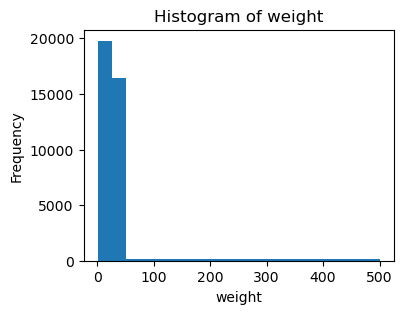

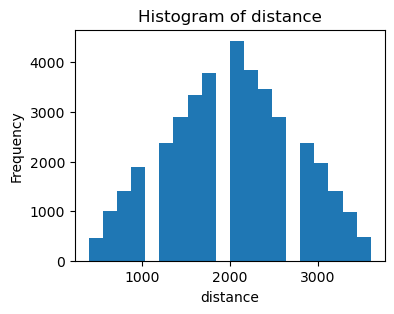

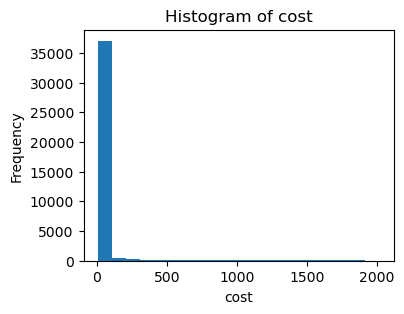

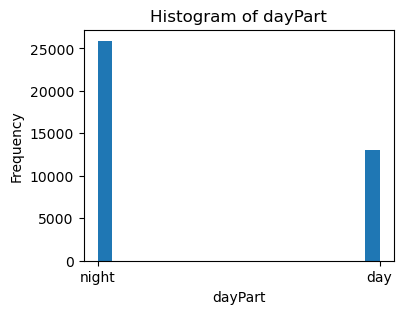

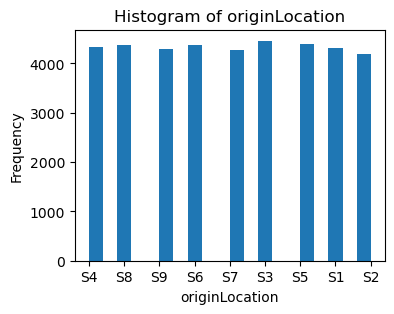

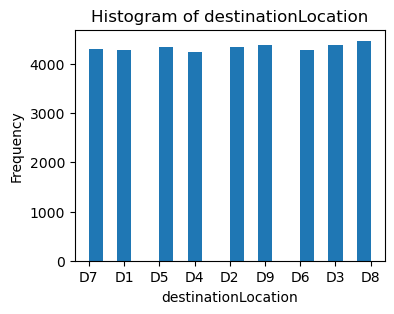

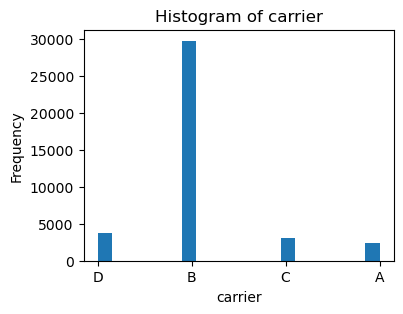

In [40]:
train_obj.check_histogram()

### Bar Plot

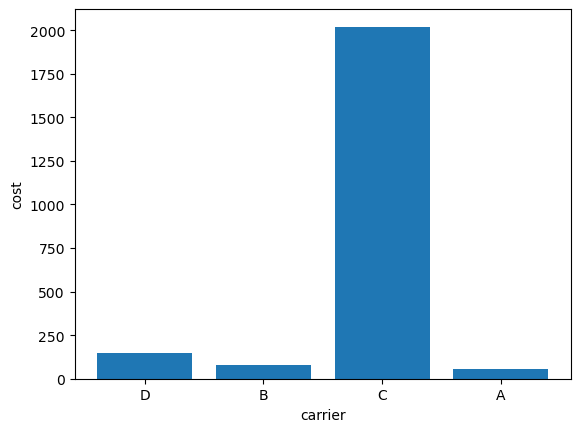

In [41]:
train_obj.bar_plot()

### Scatter Plot

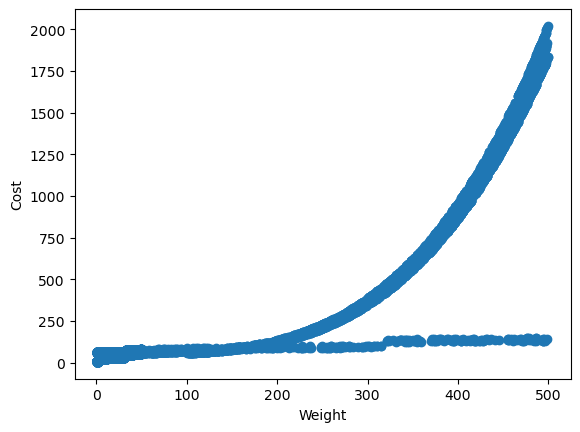

In [46]:
train_obj.scatter_plot()

# Data Preprocessing

### Checking Unique Values for each Features

In [47]:
train_obj.unique_values()

trip                   38999
date                    1074
dayPart                    2
exWeatherTag               2
originLocation             9
destinationLocation        9
distance                  17
type                       1
weight                   499
packageType                1
carrier                    4
cost                    3665
dtype: int64

#### We have some categorical columns , We will count their occurence and convert them to numericals


### Value Count for Categorical Columns

In [48]:
train_obj.value_count()

night    25904
day      13095
Name: dayPart, dtype: int64
S3    4461
S5    4388
S6    4379
S8    4368
S4    4324
S1    4312
S9    4302
S7    4267
S2    4198
Name: originLocation, dtype: int64
D8    4471
D3    4386
D9    4379
D2    4335
D5    4334
D7    4297
D1    4284
D6    4279
D4    4234
Name: destinationLocation, dtype: int64
B    29813
D     3748
C     3060
A     2378
Name: carrier, dtype: int64


### Encoding Categorical Columns using one hot encoding

In [49]:
#Encode Train set
train_obj.encode_df()

In [50]:
#Encode Test Set
test_obj.encode_df()

### Datetime Conversion

In [51]:
#convert to datetime and extract month from Train set
train_obj.date_month()

In [52]:
#convert to datetime and extract month from Test set
test_obj.date_month()

### Dropping columns 

In [53]:
# Drop columns in train set
train_obj.drop_columns()

Deleted Columns are : ['type', 'packageType', 'exWeatherTag']


In [54]:
#drop columns in test set
test_obj.drop_columns()

Deleted Columns are : ['type', 'packageType', 'exWeatherTag']


In [ ]:
#train_obj.outliers()
#train_obj.df
#new_train_df = train_obj.df[(train_obj.df['weight'] > 250) & (train_obj.df['cost'] < 100)]
#new_train_df = train_obj.df - new_train_df
#new_train_df
#train_obj.df

In [ ]:
#new_test_df = test_obj.df[test_obj.df['weight'] > 250]
#new_test_df
#test_obj.df

## Plotting correlation Heatmap to check correlation between variables

/tmp/ipykernel_32/633412044.py:105: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = self.df.corr()


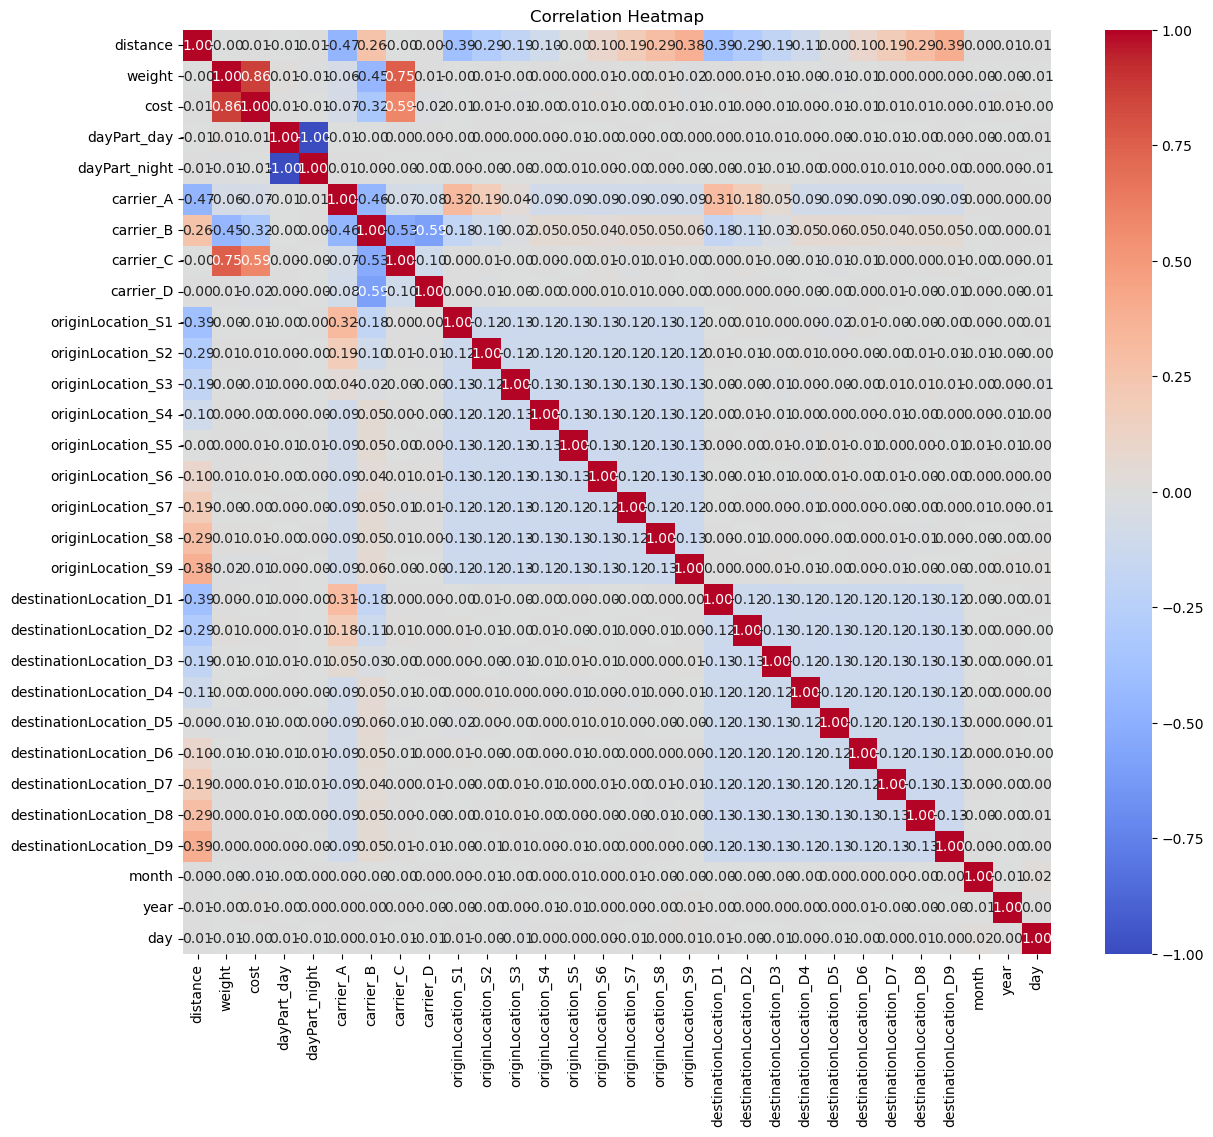

In [55]:
#correlation matrix
train_obj.correlation_matrix()

#### From the above correlation matrix, We can see that cost has high correlation with weight

In [56]:
#Make data ready to train
train_obj.load_columns()



Index(['trip', 'date', 'distance', 'weight', 'cost', 'dayPart_day',
       'dayPart_night', 'carrier_A', 'carrier_B', 'carrier_C', 'carrier_D',
       'originLocation_S1', 'originLocation_S2', 'originLocation_S3',
       'originLocation_S4', 'originLocation_S5', 'originLocation_S6',
       'originLocation_S7', 'originLocation_S8', 'originLocation_S9',
       'destinationLocation_D1', 'destinationLocation_D2',
       'destinationLocation_D3', 'destinationLocation_D4',
       'destinationLocation_D5', 'destinationLocation_D6',
       'destinationLocation_D7', 'destinationLocation_D8',
       'destinationLocation_D9', 'month', 'year', 'day'],
      dtype='object')

In [57]:
test_obj.load_columns()

Index(['trip', 'date', 'distance', 'weight', 'dayPart_day', 'dayPart_night',
       'carrier_A', 'carrier_B', 'carrier_C', 'carrier_D', 'originLocation_S1',
       'originLocation_S2', 'originLocation_S3', 'originLocation_S4',
       'originLocation_S5', 'originLocation_S6', 'originLocation_S7',
       'originLocation_S8', 'originLocation_S9', 'destinationLocation_D1',
       'destinationLocation_D2', 'destinationLocation_D3',
       'destinationLocation_D4', 'destinationLocation_D5',
       'destinationLocation_D6', 'destinationLocation_D7',
       'destinationLocation_D8', 'destinationLocation_D9', 'month', 'year',
       'day'],
      dtype='object')

## Final Features for Train set


In [58]:
train_obj.prepare_data()
train_obj.X_train
#train_obj.y_train



,distance,weight,dayPart_day,dayPart_night,carrier_A,carrier_B,carrier_C,carrier_D,originLocation_S1,originLocation_S2,...,destinationLocation_D3,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,month,year,day
0,2200,50,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,9,2017,6
1,1800,12,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,10,2017,21
2,2800,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,7,2017,15
3,3200,50,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,10,2017,22
4,2000,43,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,12,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,1200,3,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,10,2019,17
38995,2000,6,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,2019,23
38996,3000,24,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,10,2018,3
38997,2600,31,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,2,2018,26


In [ ]:
#train_obj.X_train.describe()

## Final Label for train set

In [59]:
train_obj.y_train

0        68.413152
1        36.450649
2         9.057939
3        57.320087
4        77.263777
           ...    
38994    14.987239
38995    33.214738
38996    45.172159
38997    47.541427
38998    68.054098
Name: cost, Length: 38999, dtype: float64

In [ ]:
#train_obj.y_train.describe()

## Splitting the train set and trying different regression models


In [60]:
from sklearn.model_selection import train_test_split
train_try_X, test_try_X, train_try_y, test_try_y = train_test_split(train_obj.X_train,train_obj.y_train,test_size=0.2,random_state = 42)


### We will try following Regression models and select the best fit model for actual test set
#### 1. Linear Regression Model
#### 2. Decision Tree 
#### 3. Random Forest
#### 4. XGboost 
#### 5. Gradient Boosting Regressor
#### 6. LGBM Regresssor
#### 7. Lasso

### Implementing above mentioned models and evaluation metrics

In [65]:
#Import all required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Function for Linear Regression Model
def train_linear_regression(train_try_X, train_try_y):
    model = LinearRegression()
    model.fit(train_try_X, train_try_y)
    y_pred = model.predict(test_try_X)
    mse = mean_squared_error(test_try_y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_try_y, y_pred)
    r2 = r2_score(test_try_y, y_pred)
    print(f"For Linear Regression : \n Mean Squared Error : {mse} \n RMSE : {rmse} \n Mean Absolute Error : {mae} \n R2 Score : {r2} ")
    

# Function for Decision Tree Model
def train_decision_tree(train_try_X, train_try_y):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(train_try_X, train_try_y)
    y_pred = model.predict(test_try_X)
    mse = mean_squared_error(test_try_y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_try_y, y_pred)
    r2 = r2_score(test_try_y, y_pred)
    print(f"For Decision Tree Regression : \n Mean Squared Error : {mse} \n RMSE : {rmse} \n Mean Absolute Error : {mae} \n R2 Score : {r2} ")

# Function for Random Forest Model
def train_random_forest(train_try_X, train_try_y):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_try_X, train_try_y)
    y_pred = model.predict(test_try_X)
    mse = mean_squared_error(test_try_y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_try_y, y_pred)
    r2 = r2_score(test_try_y, y_pred)
    print(f"For Random Tree Regression : \n Mean Squared Error : {mse} \n RMSE : {rmse} \n Mean Absolute Error : {mae} \n R2 Score : {r2} ")

# Function for XGBoost Model
def train_xgboost(train_try_X, train_try_y):
    model = xgb.XGBRegressor()
    model.fit(train_try_X, train_try_y)
    y_pred = model.predict(test_try_X)
    mse = mean_squared_error(test_try_y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_try_y, y_pred)
    r2 = r2_score(test_try_y, y_pred)
    print(f"For XGBoost Regression : \n Mean Squared Error : {mse} \n RMSE : {rmse} \n Mean Absolute Error : {mae} \n R2 Score : {r2}  ")

# Function for Gradient Boosting Regressor Model
def train_gradient_boosting(train_try_X, train_try_y):
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(train_try_X, train_try_y)
    y_pred = model.predict(test_try_X)
    mse = mean_squared_error(test_try_y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_try_y, y_pred)
    r2 = r2_score(test_try_y, y_pred)
    print(f"For Gradient Regression : \n Mean Squared Error : {mse} \n RMSE : {rmse} \n Mean Absolute Error : {mae} \n R2 Score : {r2} ")

# Function for LGBM Regressor Model
def train_lgbm(train_try_X, train_try_y):
    model = lgb.LGBMRegressor()
    model.fit(train_try_X, train_try_y)
    y_pred = model.predict(test_try_X)
    mse = mean_squared_error(test_try_y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_try_y, y_pred)
    r2 = r2_score(test_try_y, y_pred)
    print(f"For Light GBM : \n Mean Squared Error : {mse} \n RMSE : {rmse} \n Mean Absolute Error : {mae} \n R2 Score : {r2}  ")
    
# Function for Lasso Regression Model
def train_Lasso(train_try_X, train_try_y, alpha=1.0):
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(train_try_X, train_try_y)
    y_pred = model.predict(test_try_X)
    mse = mean_squared_error(test_try_y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_try_y, y_pred)
    r2 = r2_score(test_try_y, y_pred)
    print(f"For Lasso Regression : \n Mean Squared Error : {mse} \n RMSE : {rmse} \n Mean Absolute Error : {mae} \n R2 Score : {r2} ")

In [66]:
train_linear_regression(train_try_X, train_try_y)

For Linear Regression : 
 Mean Squared Error : 8847.500408797923 
 RMSE : 94.0611524955862 
 Mean Absolute Error : 34.891744203827244 
 R2 Score : 0.7555793884775552 


In [67]:
train_decision_tree(train_try_X, train_try_y)

For Decision Tree Regression : 
 Mean Squared Error : 3.3797108369859807 
 RMSE : 1.8383989874306341 
 Mean Absolute Error : 0.221930621461671 
 R2 Score : 0.9999066322744983 


In [68]:
train_random_forest(train_try_X, train_try_y)

For Random Tree Regression : 
 Mean Squared Error : 2.527682937636435 
 RMSE : 1.5898688429038526 
 Mean Absolute Error : 0.22269243095591718 
 R2 Score : 0.9999301703553766 


In [69]:
train_xgboost(train_try_X, train_try_y)

For XGBoost Regression : 
 Mean Squared Error : 2.1245396535921586 
 RMSE : 1.4575800676436812 
 Mean Absolute Error : 0.31847591454730756 
 R2 Score : 0.9999413075719309  


In [70]:
train_gradient_boosting(train_try_X, train_try_y)

For Gradient Regression : 
 Mean Squared Error : 19.609465950805323 
 RMSE : 4.428257665358388 
 Mean Absolute Error : 1.4261593671810353 
 R2 Score : 0.9994582698572629 


In [71]:
train_lgbm(train_try_X, train_try_y)

For Light GBM : 
 Mean Squared Error : 3.1095204869360082 
 RMSE : 1.7633832501574944 
 Mean Absolute Error : 0.44511315758253756 
 R2 Score : 0.9999140965398314  


In [72]:
train_Lasso(train_try_X, train_try_y, alpha=1.0)

For Lasso Regression : 
 Mean Squared Error : 8913.4024022257 
 RMSE : 94.41081718863417 
 Mean Absolute Error : 33.72623810245018 
 R2 Score : 0.7537587832455794 


#### We tried different models and performance metrics and came to know that XGboost model gives the best performance on given datasets i.e. RMSE = 1.457. We have used MSE, RMSE, MAE, R2 Score to evaluate predictions

### Now, We will use XGBoost Regression model to predict Cost from the actual Test datasets

In [75]:
test_obj.final_test()


,distance,weight,dayPart_day,dayPart_night,carrier_A,carrier_B,carrier_C,carrier_D,originLocation_S1,originLocation_S2,...,destinationLocation_D3,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,month,year,day
0,2000,50,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,9,2017,27
1,600,22,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,12,2017,12
2,1600,30,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,11,2018,18
3,2200,32,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,11,2019,18
4,2600,7,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,6,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1000,489,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,10,2017,26
798,2200,12,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,9,2018,1
799,2200,9,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,6,2018,20
800,1200,11,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,2019,13


### Training the model using Xgboost and Hypertuning model parameters using grid search

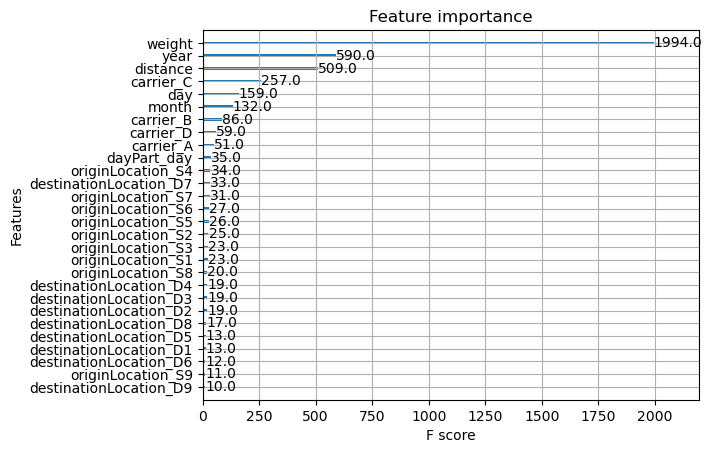

In [76]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = xgb.XGBRegressor() 
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator= model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_obj.X_train, train_obj.y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

model.fit(train_obj.X_train, train_obj.y_train)
xgb.plot_importance(model)
plt.show()

## Predicting labels from given actual test set

In [77]:
y_pred = best_model.predict(test_obj.X_test)
y_pred

array([  57.36224  ,   29.327324 ,   62.599915 ,   72.83173  ,
         34.856796 ,   40.95604  ,    9.73728  ,   31.537954 ,
         74.876976 ,   44.795288 ,   54.285965 ,   29.64429  ,
         78.75027  ,   12.92718  ,   47.273605 ,   71.95453  ,
        729.20074  ,   47.417347 ,   70.72803  ,   43.81611  ,
         75.26672  ,   65.984    ,   23.826479 ,   37.86735  ,
         40.761982 ,    8.499643 ,   63.460445 ,   22.057692 ,
         21.041433 ,   35.733673 ,   83.39971  ,   44.544796 ,
         35.64544  , 1210.2609   ,   32.811146 ,    9.339119 ,
         44.6786   ,   43.69591  ,   49.79285  ,   60.01695  ,
         75.33641  ,   49.914055 ,  178.53433  ,   69.94264  ,
         78.369255 ,   75.5926   ,   77.15832  ,  346.09436  ,
         70.87756  ,   49.232536 ,   57.374184 ,   71.73844  ,
         38.035164 ,   70.923454 ,   40.43871  ,   67.030945 ,
         39.097176 ,   45.429844 ,    7.184174 ,   66.08006  ,
         75.22452  ,   38.829937 ,   71.062675 ,   65.6

## Merging predicted cost in test set

In [78]:
test['cost'] = y_pred
test['cost']

0        57.362240
1        29.327324
2        62.599915
3        72.831734
4        34.856796
          ...     
797    1702.422485
798      38.245045
799      35.628605
800      66.048256
801    1201.697876
Name: cost, Length: 802, dtype: float32

In [80]:
submit = test[['trip','cost']]
submit

,trip,cost
0,t333282728025,57.362240
1,t35583500660,29.327324
2,t117664376784,62.599915
3,t261320757828,72.831734
4,t147086054909,34.856796
...,...,...
797,t353400176448,1702.422485
798,t112945848426,38.245045
799,t53097944970,35.628605
800,t127986960246,66.048256


## Generating a submission file 

In [82]:
csv_filename = 'submission.csv'
submit.to_csv(csv_filename, index = False)

### We Submitted the following file in Kaggle and got RMSE Score of 0.79356